# Text Analysis Using Twitter

Twitter used to be a popular source of text to analyze. Why?
- Huge user base.
- Realtime updated.
- Used to have an easy to use API.

Unfortunately, I have stopped demonstrating the Twitter API in this class because:
- Twitter has since stopped allowing __free access__ to their API. 
- Twitter data has changed in terms of its research value (in my opinion).

In terms of the API, I will talk in general terms in case it is useful. We still analyze the data itself both in lecture and in Homework 1.

How to use the API?
- Need a Twitter account.
- Need to associate a phone number with it.
- Then need to apply for a developer account.
- __and now pay for it__.

They will then provide you with four keys. The package __tweepy__ is the most handy way to use the API.

### Extracting Tweets
When do you want to do this? Usually when you want tweets from a specific user.

First step: make an API instance using the package __tweepy__


`auth = tweepy.OAuthHandler(key, key_secret)`

`auth.set_access_token(access_key, access_secret)`

`api = tweepy.API(auth,)`


The next stage would have been to look at the "home timeline" of the user like this:

`tweet = api.home_timeline(tweet_mode = 'extended')[0]._json`

This creates an object called `tweet` that is json object.

### Tweets by user

You can also use the API to scrape tweets from a specific user:

```python
def extract_by_user(user_id):
    tweets = api.user_timeline(screen_name=user_id, 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )
    return tweets
```

Here I will demonstrate from some tweets I scraped in past years.

I asked students which hashtag to scrape and they picked #sorrynotsorry and #econtwitter

In [1]:
import glob
import subprocess
import os
import json
import pandas as pd

dir_ = "C:/Users/jhtchns2/Box/ACE_592_SAE/Class_Examples/1_Text/"

Here is a for loop that I used to read from a bigger json file of tweets and put them into a dictionary:

In [3]:
file_dict={}
for file in [dir_+"sorry_tweets.json",dir_+"econ_tweets.json"]:
    print(file)
    with open(file) as f:
        tweets = json.load(f)
    file_dict[file.split("/")[-1].split(".")[0]] = tweets

C:/Users/jhtchns2/Box/ACE_592_SAE/Class_Examples/1_Text/sorry_tweets.json
C:/Users/jhtchns2/Box/ACE_592_SAE/Class_Examples/1_Text/econ_tweets.json


Now lets access one tweet:

In [4]:
tweet_json = file_dict['sorry_tweets'][4]

Some info we can get:

In [6]:
tweet_json['created_at'], tweet_json['text']

('Tue Feb 15 23:59:08 +0000 2022',
 'This is a test of my Twitter listening script.\n\nHi ACE 592 SAE!\n\n#econtwitter #sorrynotsorry')

But who is this?

In [7]:
tweet_json['user']

{'id': 73939113,
 'id_str': '73939113',
 'name': 'Jared Hutchins',
 'screen_name': 'pablohutch',
 'location': 'Champaign, IL',
 'url': 'http://jaredphutchins.com',
 'description': 'Agricultural and applied economist, Assistant Professor at @aceatIL, alum of @UW_AAE; open source fanboy, occasional nature documentary enthusiast.',
 'translator_type': 'none',
 'protected': False,
 'verified': False,
 'followers_count': 602,
 'friends_count': 487,
 'listed_count': 0,
 'favourites_count': 1798,
 'statuses_count': 1167,
 'created_at': 'Sun Sep 13 18:18:46 +0000 2009',
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': False,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'profile_background_color': 'C0DEED',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_tile': False,
 'profile_link_color': '1DA1F2',
 'profile_s

Now we have a dictionary of info about the user. Including:

In [8]:
tweet_json['user']['name'],\
tweet_json['user']['description'],\
tweet_json['user']['followers_count']

('Jared Hutchins',
 'Agricultural and applied economist, Assistant Professor at @aceatIL, alum of @UW_AAE; open source fanboy, occasional nature documentary enthusiast.',
 602)

Let's look at another tweet from the #econtwitter hashtag:

In [10]:
tweet = file_dict['econ_tweets'][5]

In [11]:
tweet['text']

"RT @economictricks: Open science -&gt; open source. Still doing your econometrics in STATA or Matlab? Here's a tweetstorm of my favorite free…"

What is different about this tweet?

In [12]:
tweet['text']

"RT @economictricks: Open science -&gt; open source. Still doing your econometrics in STATA or Matlab? Here's a tweetstorm of my favorite free…"

- It has "RT" at the beginning, meaning it is a retweet.
- It is truncated.

How do we figure out what it was quoting? We can access the quoted tweet in another dictionary:

In [13]:
tweet['retweeted_status']

{'created_at': 'Mon Feb 14 18:43:17 +0000 2022',
 'id': 1493294795405639687,
 'id_str': '1493294795405639687',
 'text': "Open science -&gt; open source. Still doing your econometrics in STATA or Matlab? Here's a tweetstorm of my favorite f… https://t.co/hmQnNXsyaS",
 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
 'truncated': True,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1253004130441928704,
  'id_str': '1253004130441928704',
  'name': 'Francis DiTraglia',
  'screen_name': 'economictricks',
  'location': 'Oxford UK',
  'url': 'https://ditraglia.com',
  'description': 'Associate Professor of Economics, University of Oxford\nFellow & Tutor of Lady Margaret Hall\nhttp://econometrics.blog',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 294,
  'friends_count': 106,
 

So this is just the thing after the colon.

In [14]:
tweet['retweeted_status']['text']

"Open science -&gt; open source. Still doing your econometrics in STATA or Matlab? Here's a tweetstorm of my favorite f… https://t.co/hmQnNXsyaS"

But how do we get the rest of it?

In [16]:
tweet['retweeted_status'].keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'extended_tweet', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'filter_level', 'lang'])

Notice the key called `"extended_tweet"`, which can be accessed:

In [17]:
tweet['retweeted_status']['extended_tweet']

{'full_text': "Open science -&gt; open source. Still doing your econometrics in STATA or Matlab? Here's a tweetstorm of my favorite free resources to help you make the transition to R. (Julia and Python are also great - I just don't know them as well)\n#EconTwitter #rstats",
 'display_text_range': [0, 257],
 'entities': {'hashtags': [{'text': 'EconTwitter', 'indices': [237, 249]},
   {'text': 'rstats', 'indices': [250, 257]}],
  'urls': [],
  'user_mentions': [],
  'symbols': []}}

So the full text is found here:

In [18]:
tweet['retweeted_status']['extended_tweet']['full_text']

"Open science -&gt; open source. Still doing your econometrics in STATA or Matlab? Here's a tweetstorm of my favorite free resources to help you make the transition to R. (Julia and Python are also great - I just don't know them as well)\n#EconTwitter #rstats"

Tweets can be identified with a tweet id:

In [19]:
tweet['retweeted_status']['id']

1493294795405639687

And using the url stub `https://twitter.com/i/web/status/` you can look it up on the website (and in the API)

When a tweet is a reply, you can see `in_reply_to_status_id`:

In [20]:
reply_tweet = file_dict['sorry_tweets'][8]

reply_tweet['text'], \
reply_tweet['in_reply_to_status_id']  

('@FIFC Can confirm I was singing I hate Dover #SorryNotSorry',
 1493692325784178689)

https://twitter.com/i/web/status/1493692325784178689

But notice it does not store the tweet in the json

### Extracting by User

Can be done this way:

In [19]:
def extract_by_user(user_id):
    tweets = api.user_timeline(screen_name=user_id, 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )
    return tweets

When I first made this homework in 2021, I did two types of tweet extraction:
- Extracted all the tweets about doge coin in a certain time period.
- Extracted all the tweets Elon Musk ever wrote.

(At the time, this was because he was pumping the market. I had no idea he would eventually own Twitter)

Here is the code I used to scrape his timeline:

```python
elonmusk_tweets = extract_by_user("elonmusk")
elon_tweets = [x._json for x in elonmusk_tweets]
elon_df = pd.DataFrame(elon_tweets)
```


Twitter has a limit of __200 tweets at a time__.

What if we need more tweets than that?

One clever trick referred to as "pagination":
1. Do an initial scrape.
2. Find the tweet ID of the oldest tweet.
3. Feed that ID into the field "max_id" and subtract 1


```python
oldest_id = elonmusk_tweets[-1].id

import time

all_tweets = elonmusk_tweets
while True:
    tweets = api.user_timeline(screen_name="elonmusk", 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           max_id = oldest_id - 1,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )
    if len(tweets) == 0:
        pass
    else:
        oldest_id = tweets[-1].id
        all_tweets.extend(tweets)
    time.sleep(1)
    print('N of tweets downloaded till now {} \r'.format(len(all_tweets)), end='',flush=True)
```

To write this in a file, it is best to use the json file format.

```python
tweets_json = [x._json for x in all_tweets]

import json

with open("./Elon_tweets.json", 'w') as outfile:
    json.dump(tweets_json,outfile)
```

### When do we use this?
When you are interested in studying the Tweets of a specific user (like Elon Musk). This is quite simple to do, but it is only for times in which you need the Tweets of certain people.




## Streaming

This is for when you essentially want to make a realtime download from Twitter to look for certain phrases.

This is how I grabbed every tweet that mentioned #DogeCoin

First you need to create a "StreamListener" object

```python
class StdOutListener(StreamListener):
    
    def on_data(self, data):   
        print(data)
        return True
        
    def on_error(self, status):
        print(status)
```

In the script, you will want to put `if __name__ =='main':` to tell it "this is what you should to when I start the script"

```python
# Handle Twitter authentification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(key, key_secret)
    auth.set_access_token(access_key, access_secret)
    stream = Stream(auth, l)
    
    while True:
        try:
            stream.filter(track=["#dogecoin"])
        except:
            continue
```

What this code does:
- Sets about a "listener: `l = StdOutListener()`
- Authenticates using my tokens:

`auth = OAuthHandler(key, key_secret)
 auth.set_access_token(access_key, access_secret)`
- Sets up a streamer: `stream = Stream(auth, l)`

Finally, set a while loop that always goes (`while True`), and tell it `try` streaming with a filter and if it runs into an error `except` and just continue anyway:

```python
    while True:
        try:
            stream.filter(track=["#dogecoin"])
        except:
            continue
```

### What is `try` and `except`?
If you are programming and you think your code will run into an error, you can tell it what to do if an error occurs.

First it will `try` to do whatever you put in the `try` block. If it runs into an error, it will then do what it says in the `except` block.

In this case, Twitter often had loading problems and I wanted it to start the listening again if it ran into a problem.

## Papers using Twitter data

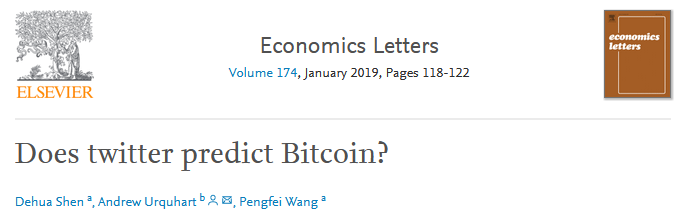

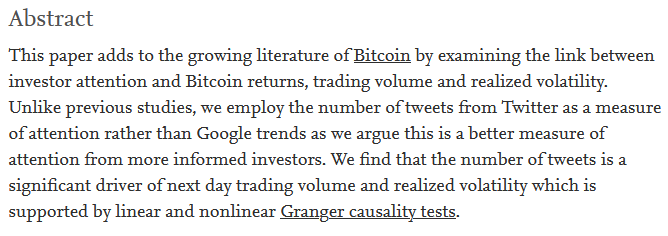

https://www.sciencedirect.com/science/article/pii/S0165176518304634

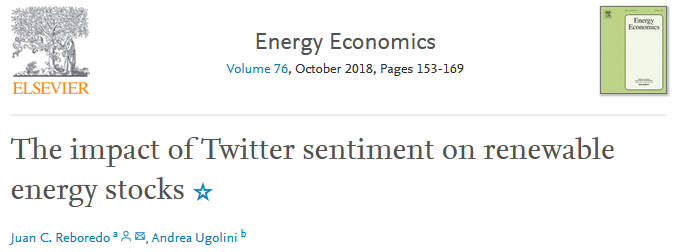
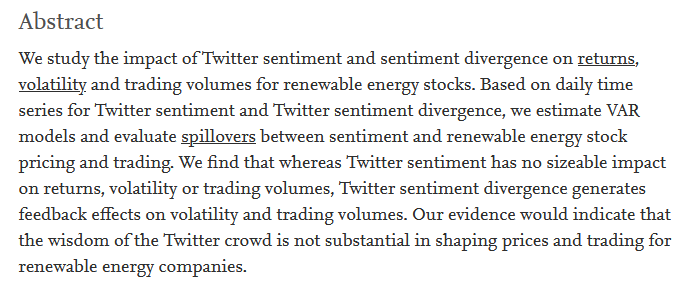

https://www.sciencedirect.com/science/article/pii/S014098831830416X

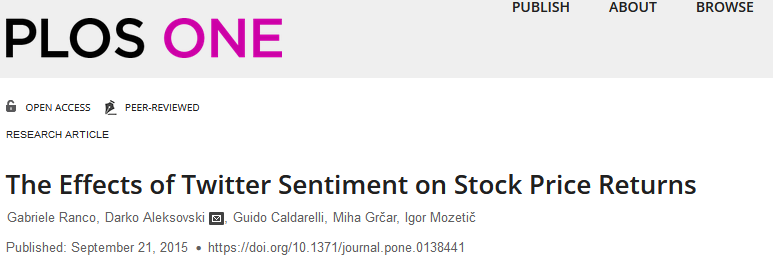
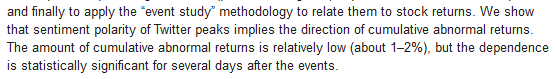

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0138441

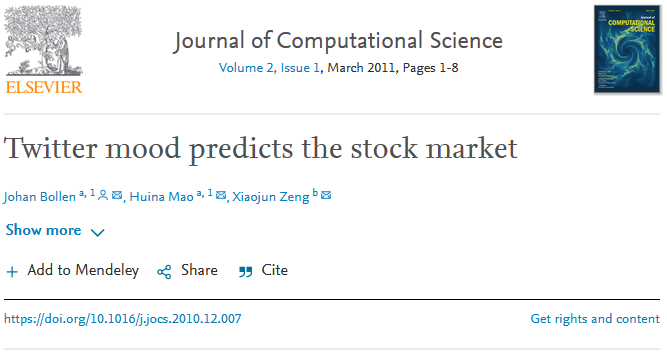

https://www.sciencedirect.com/science/article/pii/S187775031100007X